# 01-lab-线性回归和温度转换探究教案

## 1.引言

在科学研究和实际应用中，我们经常需要根据已知数据预测未知数据。线性回归是一种简单但强大的统计方法，可以用于预测连续变量之间的关系。本实验用“线性回归”算法验证摄氏温度与华氏温度的线性关系，掌握使用BaseML库训练一个线性回归模型。

## 2.实验目的

  - 通过自主探究，理解线性关系的特征并且知道可以使用线性回归算法来转换温度；
  - 通过使用BaseML的线性回归算法搭建模型，训练温度转换模型，掌握线性回归算法；
  - 通过对模型的进一步验证，能够解释如何对模型进行评估并清晰描述R平方值的含义;
  - 通过对数据集的处理，能够理解输入数据与输出数据的含义。

## 3.实验指导
### 3.1 线性回归算法介绍

回归是一种机器学习方法，简单来说，它的作用是预测数值。比如，我们想通过知道的房子面积、房间数量等信息，来猜测这个房子的价格。这种预测价格的任务，就是一个回归任务。
在回归任务中，有一种叫做线性回归的方法。这个方法就像是使用一条直线来帮助我们预测。比如，如果我们知道很多房子的面积和它们的价格，这些数值可以构成一个散点图。线性回归的任务就是找到一条直线，这条直线尽可能地接近所有这些数据点，通过房子的面积来告诉我们大概的价格。这样，我们就可以用这个方法来预测其他房子的价格。以此类推，我们还可以预测商品的销售额、银行贷款的额度等。
线性方程是数学中的一种方程，它描述了两个或多个变量之间的线性关系。在最简单的形式中，线性方程可以表示为：𝑎𝑥+𝑏=0。这里：a 是一个非零常数，称为方程的系数；x 是一个变量；b 是另一个常数。

![线性方程](../image/01-lab-001.png)

感兴趣的同学可以点击链接查看更详细的线性回归算法介绍：

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn-linear-model-linearregression

### 3.2 训练线性回归模型的程序实现

BaseML库提供了众多机器学习训练方法，如线性回归、KNN、SVM等等，可以快速训练和应用模型。接下来以线性回归算法为例，进行基本语法说明。

1. 基础代码示例

Setting fit_intercept to True
Setting positive to False
Saving model checkpoints...
Saved successfully!
验证r2-score为：100.0%


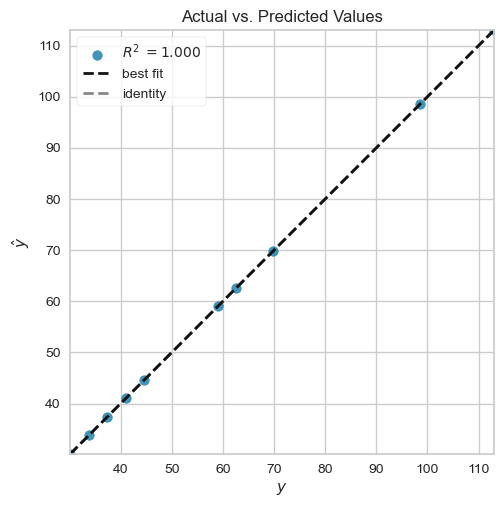

In [1]:
# 导入基础库/导入BaseML库中的Regression（回归分析）模块，并将其别名设置为reg
from BaseML import Regression as reg
# 实例化模型/创建一个线性回归模型的实例
model = reg(algorithm = 'LinearRegression')
# 指定某个数据集/data.csv是一个表格格式的文件，包含用于训练的数据
model.set_para(fit_intercept=True, positive=False)
model.load_tab_data('./data/model_train.csv')
# 模型训练
model.train()
# 模型保存至指定路径，保存的文件名为linearegression_data.pkl，用于之后加载和使用模型
model.save('checkpoints/linearegression_data.pkl')

# 载入已保存的模型 
model.load('checkpoints/linearegression_data.pkl')
# 模型评估/这里使用R的平方值（𝑅2）作为评价指标，它衡量模型对数据的拟合程度。data.csv是包含测试数据的文件
r2,result = model.valid('./data/model_evaluation.csv', metrics='r2')
# 评价指标可视化
model.metricplot()

对回归任务来说，简单好用的评估指标之一是R平方值。R平方值的范围在0和1之间。预测结果完全准确时R平方值为1，数值越接近1表示误差越小，反之表示误差大。当R平方值为0时，意味着模型与实际数据之间没有相关性。
.pkl文件格式可以理解为将python中的数组、列表等持久化地存储在硬盘上的一种方式。

2. 模型参数设置

线性回归算法的参数及其默认值包括fit_intercept=True, positive=False。fit_intercept决定了是否需要计算截距（即线性模型的常数项b）。

```
model.set_para(fit_intercept=True, positive=False)
```

如果设置为True，则线性回归模型会计算一个截距，即y轴上的截距，这样模型可以表示为y = mx + b，其中m是斜率，b是截距。如果设置为False，则模型不会计算截距，方程简化为通过原点的形式y = mx；positive用于限制线性回归模型中系数（斜率）的正负，默认值为False。默认情况下，线性回归模型不限制系数的正负，允许模型根据数据自由地选择最佳的系数，无论它们是正是负。

## 4.实验资源和步骤
### 4.1 实验资源

实验工具
- BaseML库

实验数据集

实验一对应的数据集(输入数据为摄氏温度，输出数据为华氏温度。该数据集用于训练模型。)
- data/model_train.csv(训练数据集)
- data/model_evaluation.csv(验证数据集)

实验二对应的数据集(输入数据为摄氏温度，输出数据为华氏温度。该数据集用于训练模型，建议学生可以自行收集和验证。)
- data/model_train_2.csv(训练数据集)
- data/model_evaluation_2.csv(验证数据集)

实验拓展所用数据集。输入数据为摄氏温度，输出数据为华氏温度。该数据集用于基于Excel的散点图绘制与趋势线分析。
- data/Celsius to Fahrenheit.xlsx

### 4.2 实验步骤

### 4.2.1 实验一：输入摄氏温度输出华氏温度

通过观察摄氏温度和华氏温度对应表，我们知道这二者之间存在一定的对应关系。假设我们并不清楚它们之间的转换公式，能否通过训练线性回归模型来找出二者之间关系？请以小组为单位，参考资源包中的代码完成模型训练，实现功能：“输入摄氏温度输出华氏温度”。主要实践内容包括：

1. 步骤1：数据准备

实验一需要用到的数据集有model_train.csv和model_evaluation.csv。

2. 步骤2：加载模型

首先我们需要导入必要的库文件并构建线性回归模型。LinearRegression用于线性回归，它可以帮助我们建立和分析线性模型，从而预测变量之间的关系。

In [2]:
# 更新库文件
%pip install --upgrade BaseML
# 导入库文件，选择回归模块
from BaseML import Regression as reg
# 构建线性回归模型
model = reg(algorithm = 'LinearRegression')

Note: you may need to restart the kernel to use updated packages.


3. 步骤3：训练模型

将数据集载入模型，进行模型训练，并将模型保存至指定路径。

In [3]:
# 从data/model_train.csv路径载入数据集
model.load_tab_data('data/model_train.csv')
# 训练模型
model.train()
# 将模型保存至checkpoints/BaseML_1.pkl
model.save('checkpoints/BaseML_1.pkl')

Saving model checkpoints...
Saved successfully!


4. 步骤4：验证模型

模型训练完成，但是该模型效果如何？R的平方值可以评价回归模型的准确度。因此，我们可以根据以下的代码进行模型验证。

验证r2-score为：100.0%


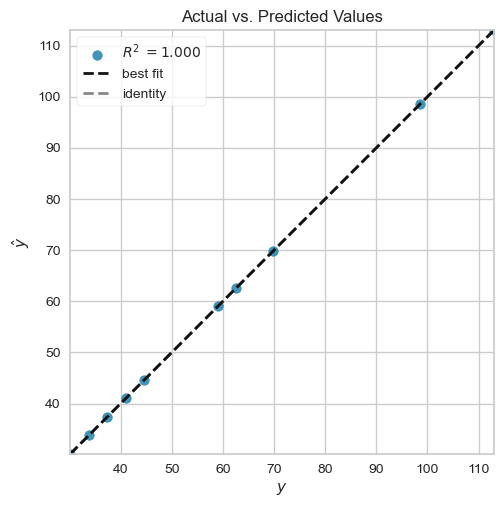

In [4]:
model.load('checkpoints/BaseML_1.pkl')
# 读取验证集进行验证并计算R平方值
r2,result = model.valid('data/model_evaluation.csv', metrics='r2') # 载入验证数据
model.metricplot() # 可视化验证效果

In [5]:
# 输出评估指标计算结果
print(r2)

1.0


In [6]:
# 输出每条数据的模型推断值
print(result)

[ 30.2  33.8  37.4  41.   44.6  59.   62.6  69.8  98.6 113. ]


5. 步骤5：应用模型

模型验证后我们就可以应用模型啦。输入摄氏温度，测试输出的华氏温度是否正确。

#### 4.2.2 实验二：输入华氏温度输出摄氏温度

通过实验一，我们已经实现了“输入摄氏温度，输出为华氏温度”的功能。但是如果要训练输入“华氏温度，输出为摄氏温度”的模型，我们又该如何实现呢？（提示：数据集需要做什么修改？）请以小组为单位，参考资源包中的代码完成模型训练，实现功能：“输入华氏温度，输出为摄氏温度”。

1. 步骤1：数据准备

创建一个新的训练数据集model_train_2.csv，将原训练数据集（data/model_train.csv）的输入和输出列互换，粘贴至新数据集并上传至data文件中。同理，创建新的评估数据集data/model_evaluation_2.csv。

2. 步骤2：加载模型

In [8]:
# 更新库文件
%pip install --upgrade BaseML
# 导入库文件，选择回归模块
from BaseML import Regression as reg
# 构建线性回归模型
model = reg(algorithm = 'LinearRegression')
# 从data/model_train_2.csv路径载入数据集
model.load_tab_data('data/model_train_2.csv')

Note: you may need to restart the kernel to use updated packages.


(array([[  5. ],
        [ 14. ],
        [ 21.2],
        [ 26.6],
        [ 28.4],
        [ 32. ],
        [ 35.6],
        [ 39.2],
        [ 42.8],
        [ 48.2],
        [ 50. ],
        [ 51.8],
        [ 53.6],
        [ 55.4],
        [ 60.8],
        [ 64.4],
        [ 66.2],
        [ 68. ],
        [ 71.6],
        [ 77. ],
        [ 78.8],
        [ 82.4],
        [ 86. ],
        [ 87.8],
        [ 96.8],
        [111.2],
        [134.6]]),
 array([-15., -10.,  -6.,  -3.,  -2.,   0.,   2.,   4.,   6.,   9.,  10.,
         11.,  12.,  13.,  16.,  18.,  19.,  20.,  22.,  25.,  26.,  28.,
         30.,  31.,  36.,  44.,  57.]),
 None,
 None)

3. 步骤3：训练模型

In [9]:
# 训练模型
model.train()
# 将模型保存至checkpoints/BaseML_2.pkl
model.save('checkpoints/BaseML_2.pkl')

Saving model checkpoints...
Saved successfully!


4. 步骤4：验证模型

验证r2-score为：100.0%


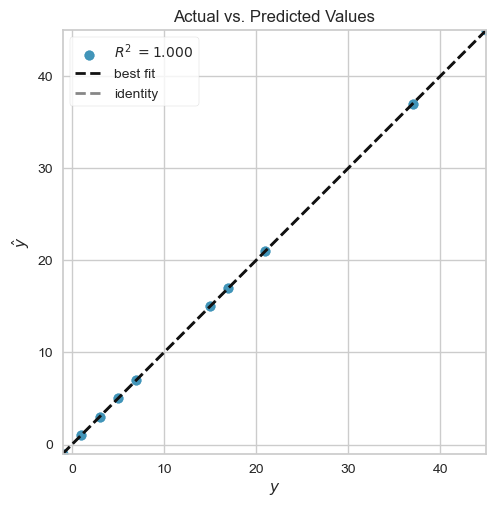

In [10]:
model.load('checkpoints/BaseML_2.pkl')
# 读取验证集进行验证并计算R平方值
r2,result = model.valid('data/model_evaluation_2.csv', metrics='r2') # 载入验证数据
model.metricplot() # 可视化验证效果

In [11]:
# 输出评估指标计算结果
print(r2)

1.0


In [12]:
# 输出每条数据的模型推断值
print(result)

[-1.  1.  3.  5.  7. 15. 17. 21. 37. 45.]


5. 步骤5：应用模型

模型验证后我们就可以应用模型,输入华氏温度，测试输出的摄氏温度是否正确。

In [13]:
# 执行前替换你需要输入的温度值(25)
data = float('25')
y = model.inference([data])
print('该华氏温度经模型转换得到的摄氏温度为：', y[0])

该华氏温度经模型转换得到的摄氏温度为： -3.888888888888898


## 5.实验结论与拓展

### 5.1 实验结论

- 结论之一
  - 通过本次实验，我们成功地构建了一个线性回归模型，用于预测摄氏温度和华氏温度之间的关系。同时，通过R平方值指标对模型的推理能力进行了评估，结果显示模型具有较高的预测准确性。
- 结论之二
  - 机器学习算法能够从数据中自动寻找规律，这个训练模型的过程叫做学习。

### 5.2 实验拓展

“线性回归”是一个常见的数据分析方法，在很多数据分析软件能找到。请用Excel中的图表中“趋势线分析”功能研究这一温度转换数据集，并体会R平方值的作用。

## 7.知识链接（补充的相关知识）
### 7.1 “回归”一词的来源

“回归”（Regression）这个词汇在统计学中的使用起源于19世纪的一位英国科学家兼统计学家弗朗西斯·高尔顿（Francis Galton）。高尔顿在研究人类身高遗传问题时，观察到父母的身高与子女的身高之间的关系。他发现，如果父母的身高偏离平均值，他们的子女的身高往往会向平均值靠拢，这种现象后来被称为“回归到平均值”。高尔顿在1886年发表的一篇论文中首次使用了“回归”这个词，他用它来描述这种趋势，即异常值的后代往往会有向群体平均值靠拢的倾向。这个词来源于拉丁语“regressus”，意为“后退”。在高尔顿的语境中，它指的是量度的值向后退回到平均水平的趋势。后来，“回归”这一概念在统计学中被进一步发展，形成了回归分析这一重要的统计方法，用于估计和预测变量之间的关系。

## 7.2 常用的模型评估指标

在回归任务中，除了R平方值之外，还有几种常用的评估指标来衡量模型的性能：
  - 均方误差（Mean Squared Error, MSE）：计算所有预测值与实际值之差的平方的平均值。MSE越小，表示模型的预测值与真实值越接近。
  - 均方根误差（Root Mean Squared Error, RMSE）：MSE的平方根，与原始数据具有相同的单位，更容易解释。
  - 均绝对误差（Mean Absolute Error, MAE）：计算所有预测值与实际值之差的绝对值的平均值。MAE对异常值的敏感度较低。
  - 平均绝对百分比误差（Mean Absolute Percentage Error, MAPE）：预测误差的绝对值与实际值的比例的平均值，通常以百分比表示。
  - 决定系数（Adjusted R-squared）：R平方值的调整版本，考虑了模型中变量的数量，适用于包含多个自变量的模型。
  - F统计量（F-statistic）：用于测试模型中自变量对因变量的联合影响，检验模型的总体有效性。
  - 残差图（Residual Plots）：通过绘制实际值与预测值之间的残差，可以检查模型是否违反了线性回归的假设。
这些指标从不同的角度评估模型的性能，通常结合使用多个指标来全面评价模型的准确性和可靠性。在实际应用中，选择哪个指标取决于具体的数据特性和业务需求。